In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('/content/online_shoppers_intention.csv')

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
categorical_columns=['Weekend','Revenue']
for col in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    print('Column:', col)
    print('Original categories:', encoder.classes_)
    print('Encoded values:', encoder.transform(encoder.classes_))
    print('\n')
    df[col] = encoder.fit_transform(df[col])

Column: Weekend
Original categories: [False  True]
Encoded values: [0 1]


Column: Revenue
Original categories: [False  True]
Encoded values: [0 1]




In [9]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [10]:
df.duplicated().value_counts()

False    12205
True       125
Name: count, dtype: int64

In [11]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

       Administrative  Administrative_Duration  Informational  \
158                 0                      0.0              0   
159                 0                      0.0              0   
178                 0                      0.0              0   
418                 0                      0.0              0   
456                 0                      0.0              0   
...               ...                      ...            ...   
11934               0                      0.0              0   
11938               0                      0.0              0   
12159               0                      0.0              0   
12180               0                      0.0              0   
12185               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
158                       0.0               1                      0.0   
159                       0.0               1                      0.0 

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
cols_to_scale = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped_data = df.groupby('TrafficType')
average_revenue = grouped_data['Revenue'].mean()
total_revenue = grouped_data['Revenue'].sum()
revenue_comparison = pd.DataFrame({'Average Revenue': average_revenue, 'Total Revenue': total_revenue})
print(revenue_comparison)

             Average Revenue  Total Revenue
TrafficType                                
1                   0.109715            262
2                   0.216569            847
3                   0.089419            180
4                   0.154784            165
5                   0.215385             56
6                   0.119639             53
7                   0.300000             12
8                   0.276968             95
9                   0.097561              4
10                  0.200000             90
11                  0.190283             47
12                  0.000000              0
13                  0.059066             43
14                  0.153846              2
15                  0.000000              0
16                  0.333333              1
17                  0.000000              0
18                  0.000000              0
19                  0.058824              1
20                  0.259067             50


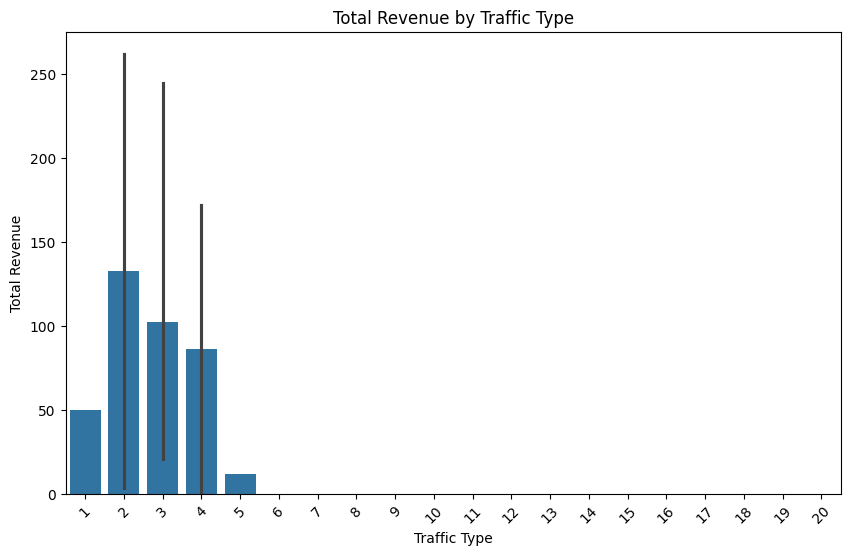

In [15]:
# Sort the revenue comparison dataframe in descending order based on the revenue metric
revenue_comparison.sort_values(by='Total Revenue', ascending=False, inplace=True)

# Visualize the sorted data
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_comparison, x=df['TrafficType'], y='Total Revenue')
plt.title('Total Revenue by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [16]:
df['Revenue'].value_counts()

Revenue
0    10297
1     1908
Name: count, dtype: int64

In [17]:
X=df.drop('Revenue',axis=1)
y=df['Revenue']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [19]:
y_train.value_counts()

Revenue
0    8238
1    1526
Name: count, dtype: int64

In [20]:
y.value_counts()

Revenue
0    10297
1     1908
Name: count, dtype: int64

In [21]:
y_test.value_counts()

Revenue
0    2059
1     382
Name: count, dtype: int64

In [22]:
X_train.shape

(9764, 17)

In [23]:
X_test.shape

(2441, 17)

In [24]:
X_train[:10]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
7556,8,0.059904,1,0.0,42,0.016451,0.000000,0.022727,0.103264,0.0,Nov,2,2,5,2,Returning_Visitor,0
11924,0,0.000000,0,0.0,30,0.014088,0.000000,0.036667,0.094394,0.0,Dec,2,2,7,2,New_Visitor,0
3306,0,0.000000,0,0.0,13,0.006583,0.000000,0.141026,0.000000,0.8,May,1,1,1,2,Returning_Visitor,0
207,2,0.011769,0,0.0,5,0.008730,0.000000,0.142857,0.000000,0.0,Mar,2,2,7,2,New_Visitor,1
4460,0,0.000000,0,0.0,16,0.024999,0.000000,0.066667,0.000000,0.0,May,4,2,2,13,Returning_Visitor,0
6786,5,0.023450,0,0.0,27,0.016437,0.043103,0.084483,0.025234,0.0,Oct,2,5,1,13,Returning_Visitor,0
1277,11,0.482704,0,0.0,16,0.028916,0.000000,0.068182,0.029802,0.0,Mar,1,1,2,3,Returning_Visitor,0
5921,3,0.024009,0,0.0,9,0.021043,0.000000,0.083333,0.000000,0.0,Nov,2,2,2,3,New_Visitor,0
6562,8,0.036994,0,0.0,7,0.001277,0.166667,0.120833,0.000000,0.0,Sep,2,2,1,1,Returning_Visitor,0
962,3,0.040897,0,0.0,10,0.004332,0.000000,0.038462,0.000000,0.0,Mar,3,2,1,2,Returning_Visitor,1


**APPLY SMOTE TECHNIQUE TO HANDLE CLASS IMBALANCE**

In [25]:
from imblearn.over_sampling import SMOTE
X_encoded = pd.get_dummies(X)
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_encoded, y)
y_sm = pd.Series(y_sm)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [27]:
# Number of classes in training Data
y_train.value_counts()

Revenue
1    8238
0    8237
Name: count, dtype: int64

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9050740470988103
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2060
           1       0.89      0.92      0.91      2059

    accuracy                           0.91      4119
   macro avg       0.91      0.91      0.91      4119
weighted avg       0.91      0.91      0.91      4119



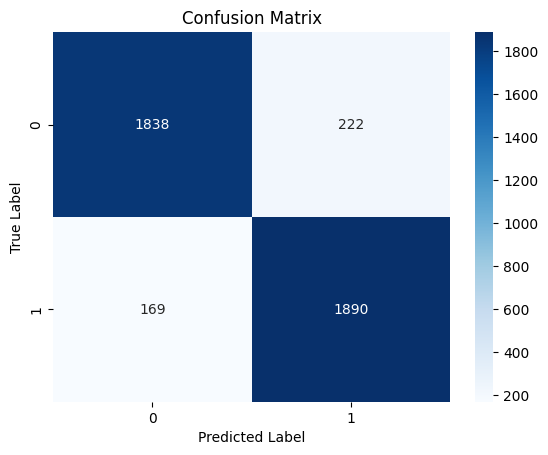

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [32]:
import joblib
model_filename = 'DecisionTree.pkl'
joblib.dump(dt, model_filename)
print(f'Model saved to {model_filename}')

Model saved to DecisionTree.pkl


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb}')
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.928866229667395
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2060
           1       0.93      0.93      0.93      2059

    accuracy                           0.93      4119
   macro avg       0.93      0.93      0.93      4119
weighted avg       0.93      0.93      0.93      4119



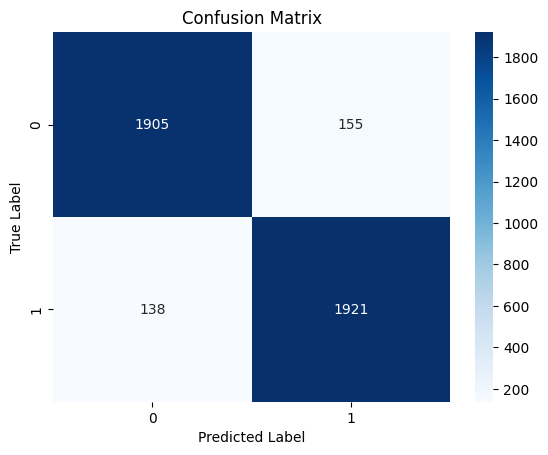

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:
import joblib
model_filename = 'GradientBoosting.pkl'
joblib.dump(dt, model_filename)
print(f'Model saved to {model_filename}')

Model saved to GradientBoosting.pkl
